In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> twitter_samples
      Unzipping corpora/twitter_samples.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt
      Unzipping tokenizers/punkt.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
# Import Required packages

from nltk.corpus import twitter_samples
import re
import pandas as pd
import numpy as np
from textblob.classifiers import NaiveBayesClassifier
import tweepy as tw
from textblob import TextBlob
import matplotlib.pyplot as plt

In [0]:
# Extract positive and negative tweets

pos = twitter_samples.strings('positive_tweets.json')
neg = twitter_samples.strings('negative_tweets.json')

In [0]:
# Some data cleansing

counter = 0
po = []
for i in pos:
  counter += 1
  if counter>5000:
    break
  po.append(re.sub('[^A-Za-z0-9 *]+',' ',(re.sub('(@|#|&)','',(re.sub('http.*','',i))))))

counter = 0
no = []
for i in neg:
  counter += 1
  if counter>5000:
    break
  no.append(re.sub('[^A-Za-z0-9 *]+',' ',(re.sub('(@|#|&)','',(re.sub('http.*','',i))))))

In [8]:
print(len(po))

5000


In [18]:
import io
from google.colab import files
uploaded = files.upload()
dfpos = pd.read_csv(io.BytesIO(uploaded['SA_format_positive.csv']))

Saving SA_format_positive.csv to SA_format_positive (2).csv


In [20]:
import io
from google.colab import files
uploaded = files.upload()
dfneg = pd.read_csv(io.BytesIO(uploaded['SA_format_negative.csv']))

Saving SA_format_negative.csv to SA_format_negative (2).csv


In [0]:
# Append to existing list

for i in dfpos['Tweet']:
    po.append(i)
    
for i in dfneg['Tweet']:
    no.append(i)

In [0]:
# Append the labels to tweets

pos_list = []
neg_list = []

for i in po:
    pos_list.append((i, 'positive'))
for i in no:
    neg_list.append((i, 'negative'))


In [0]:
# Shuffle the data and prepare training and testing sets

np.random.shuffle(pos_list)
np.random.shuffle(neg_list)
training_set = pos_list[:4000] + neg_list[:4000]
testing_set = pos_list[4000:5000] + neg_list[4000:5000]

In [26]:
# Train the Naive Bayes classifier on training set and calculate the accuracy on testing set

cl = NaiveBayesClassifier(training_set)
cl_acc = cl.accuracy(testing_set)
print (cl_acc)

0.8


In [27]:
# Fetch Tweets from Twitter API. I used my Twitter developer account credentials here for authentication purposes

consumer_key = 'QIaYDkttWOb5aF9pSaaJla4KZ'
consumer_secret = 'nrdGhaGPYxhsKCbUkRD8mNcLjXOWTcybh9rrdRuepgRghMHCpD'
access_token = '1204316269484240897-PnKs9wvsH8SCmzeOueJk3q5yX7FiMu'
access_token_secret = '1I4e76z1SLaLBZ4k39fT2xWOjxd9Mo3QY9128anL198bg'

auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
user = api.me()

search_words = input("What would you like to search for : ")
how_many = int(input("How many tweets we should analyse : "))

new_search = search_words + " -filter:retweets" + " -filter:comments"    
twee = tw.Cursor(api.search,
              q=new_search,result_type = 'recent',
              lang="en", tweet_mode='extended'
              ).items(how_many)

tw3 =[]
tw2 = list(i.full_text for i in twee)
for i in tw2:
    tw3.append(re.sub('[^A-Za-z0-9 *]+','',re.sub('https.*','',i)))
    


What would you like to search for : Modi
How many tweets we should analyse : 150


In [29]:
def percent(part, whole):
    return(100* float(part)/float(whole))

pos_tw = 0
neg_tw = 0
pos_per = 0
neg_per = 0

for i in tw3:
    if cl.classify(i) == 'positive':
        pos_tw += 1
    elif cl.classify(i) == 'negative':
        neg_tw += 1
        
print('Sentiment distribution for the %s term. The result is obtained after analysing %s tweets' %(search_words, how_many)) 

pos_per = format((percent(pos_tw,how_many)), '.2f')
neg_per = format((percent(neg_tw,how_many)), '.2f')

Sentiment distribution for the Modi term. The result is obtained after analysing 150 tweets


107


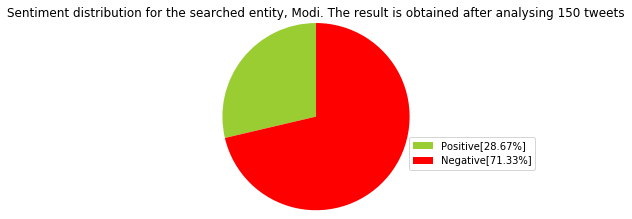

In [59]:
# Plot the distribution

labels = ['Positive[' +str(pos_per)+'%]', 'Negative[' +str(neg_per)+'%]']
sizes = [pos_per,neg_per]
color = ['yellowgreen','red']
patches,texts = plt.pie(sizes,colors=color,startangle=90,radius=2)
plt.legend(patches, labels,loc='lower left', bbox_to_anchor = (1.25,0,1,1))
plt.title('Sentiment distribution for the searched entity, %s. The result is obtained after analysing %s tweets' %(search_words, how_many), y= 1.30)

plt.tight_layout()
plt.show()